#  各种包

In [1]:
import pandas as pd 
import numpy as np
#from numpy.core.umath_tests import inner1d
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split, cross_val_score,  RepeatedStratifiedKFold,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from collections import Counter

# modelos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import  ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


import sys

# 数据导入

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 预处理 

In [4]:
# data1 : without id
data = data.drop(['id'], axis=1)


In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [7]:
label = [1,2,3,4,5]
data["age_mean"] = pd.cut(data["age"], 5, labels = label)
data["age_mean"].value_counts()
bmi_group = data.groupby("age_mean")["bmi"].mean() #将年龄阶段分为五组，分别计算平均的bmi
bmi_group

age_mean
1    20.787661
2    28.601332
3    31.425088
4    31.580618
5    29.415118
Name: bmi, dtype: float64

In [8]:
def bmi_val(cols): #给 bmi 按年龄分配平均值
    bmi = cols[0]
    age_mean = cols[1]
    
    if pd.isnull(bmi):
        if age_mean == 1:
            return 20.7
        elif age_mean == 2:
            return 28.6
        elif age_mean == 3:
            return 31.4
        elif age_mean == 4:
            return 31.6
        elif age_mean == 5:
            return 29.4
    else:
        return bmi

In [9]:
data["bmi"] = data[["bmi","age_mean"]].apply(bmi_val, axis=1)

In [10]:
data.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_mean             0
dtype: int64

In [11]:
data.gender = data.gender.apply(
    lambda x: 0 
    if ((x == 'Female') or (x == 'Other')) 
    else 1)

#将other 改成 Female

In [12]:
data.gender.value_counts()

0    2995
1    2115
Name: gender, dtype: int64

In [13]:
data['age'] = data['age'].apply(lambda x: round(x))
data['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [14]:
Feature = data.columns
Feature

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_mean'],
      dtype='object')

# 数据类型转换

In [ ]:
# transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
# pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', LR)])    
# scores = evaluate_model(X, y, pipeline)
# # results.append(scores)
# # print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# scores

In [15]:
data.select_dtypes('object')

,ever_married,work_type,Residence_type,smoking_status
0,Yes,Private,Urban,formerly smoked
1,Yes,Self-employed,Rural,never smoked
2,Yes,Private,Rural,never smoked
3,Yes,Private,Urban,smokes
4,Yes,Self-employed,Rural,never smoked
...,...,...,...,...
5105,Yes,Private,Urban,never smoked
5106,Yes,Self-employed,Urban,never smoked
5107,Yes,Self-employed,Rural,never smoked
5108,Yes,Private,Rural,formerly smoked


In [ ]:
# #这个地方的处理很有问题。
# ohe = OneHotEncoder(drop = 'first', sparse=False, handle_unknown = 'error')
# data_t = pd.DataFrame(ohe.fit_transform(data.select_dtypes('object')))

# data_t.columns = ohe.get_feature_names()
# data_t.head(2)
# data_t.shape

# 最新改变


In [16]:
data.select_dtypes('object')

,ever_married,work_type,Residence_type,smoking_status
0,Yes,Private,Urban,formerly smoked
1,Yes,Self-employed,Rural,never smoked
2,Yes,Private,Rural,never smoked
3,Yes,Private,Urban,smokes
4,Yes,Self-employed,Rural,never smoked
...,...,...,...,...
5105,Yes,Private,Urban,never smoked
5106,Yes,Self-employed,Urban,never smoked
5107,Yes,Self-employed,Rural,never smoked
5108,Yes,Private,Rural,formerly smoked


In [26]:
data.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [18]:
data.ever_married

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object

In [19]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [28]:
for i in range(len(data.ever_married)):
    if data.ever_married[i] == 'Yes':
        data.ever_married[i] = 1

    elif data.ever_married[i] == 'No':
        data.ever_married[i] = 0
print(data.ever_married)

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: object


In [31]:
data.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

## work_type

In [32]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [33]:
for i in range(len(data.work_type)):
    if data.work_type[i] == 'Private':
        data.work_type[i] = 0
    elif data.work_type[i] == 'Self-employed':
        data.work_type[i] = 1
    elif data.work_type[i] == 'children':
        data.work_type[i] = 2
    elif data.work_type[i] == 'Govt_job':
        data.work_type[i] = 3
    elif data.work_type[i] == 'Never_worked':
        data.work_type[i] = 4
        
print(data.work_type)

0       0
1       1
2       0
3       0
4       1
       ..
5105    0
5106    1
5107    1
5108    0
5109    3
Name: work_type, Length: 5110, dtype: object


<ipython-input-33-1b13aa098b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 0
<ipython-input-33-1b13aa098b83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 1
<ipython-input-33-1b13aa098b83>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 3
<ipython-input-33-1b13aa098b83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [34]:
data.work_type.value_counts()

0    2925
1     819
2     687
3     657
4      22
Name: work_type, dtype: int64

## Residence_type

In [35]:
data.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [36]:
for i in range(len(data.Residence_type)):
    if data.Residence_type[i] == 'Urban':
        data.Residence_type[i] = 0
    elif data.Residence_type[i] == 'Rural':
        data.Residence_type[i] = 1

print(data.Residence_type)

0       0
1       1
2       1
3       0
4       1
       ..
5105    0
5106    0
5107    1
5108    1
5109    0
Name: Residence_type, Length: 5110, dtype: object


<ipython-input-36-488360f52dd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Residence_type[i] = 0
<ipython-input-36-488360f52dd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Residence_type[i] = 1


In [37]:
data.Residence_type.value_counts()

0    2596
1    2514
Name: Residence_type, dtype: int64

## 	smoking_status

In [38]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [42]:
data.smoking_status

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [43]:
data.smoking_status[1] == 'never smoked'

True

In [44]:
for i in range(len(data.smoking_status)):
    if data.smoking_status[i] == 'never smoked':
        data.smoking_status[i] = 0
    elif data.smoking_status[i] == 'Unknown':
        data.smoking_status[i] = 1
    elif data.smoking_status[i] == 'formerly smoked':
        data.smoking_status[i] = 2
    elif data.smoking_status[i] == 'smokes':
        data.smoking_status[i] = 3

        
print(data.smoking_status)

0       2
1       0
2       0
3       3
4       0
       ..
5105    0
5106    0
5107    0
5108    2
5109    1
Name: smoking_status, Length: 5110, dtype: object


<ipython-input-44-ba4d67cfac70>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.smoking_status[i] = 2
<ipython-input-44-ba4d67cfac70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.smoking_status[i] = 0
<ipython-input-44-ba4d67cfac70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.smoking_status[i] = 3
<ipython-input-44-ba4d67cfac70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [45]:
data.smoking_status.value_counts()

0    1892
1    1544
2     885
3     789
Name: smoking_status, dtype: int64

In [46]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_mean
0,1,67,0,1,1,0,0,228.69,36.6,2,1,5
1,0,61,0,0,1,1,1,202.21,31.6,0,1,4
2,1,80,0,1,1,0,1,105.92,32.5,0,1,5
3,0,49,0,0,1,0,0,171.23,34.4,3,1,3
4,0,79,1,0,1,1,1,174.12,24.0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,0,0,83.75,29.4,0,0,5
5106,0,81,0,0,1,1,0,125.20,40.0,0,0,5
5107,0,35,0,0,1,1,1,82.99,30.6,0,0,3
5108,1,51,0,0,1,0,1,166.29,25.6,2,0,4


In [ ]:
# # data_t[0:1] #取行、
# data_t[['x1_Never_worked','x1_Private'\
#      ,'x1_Self-employed','x1_children']]
# df = pd.DataFrame(data_t)
# df.iloc[: ,1:2]

# D = pd.concat([df.iloc[: ,1:2], df.iloc[: ,2:3]], axis=1)
# D

In [ ]:
# data.smoking_status.value_counts()

In [ ]:
# # data.select_dtypes('object')  #ever_married[yes/no];['x0_Yes'  work_type[pri,self,child,gov,never]'x1_Never_worked', 'x1_Private', 'x1_Self-employed',
#        #'x1_children',; 
# #residence_type'x2_Urban', smoking_status【never。unkno,former,smokes:x3_formerly smoked', 'x3_never smoked',
#        #'x3_smokes'


# data_t.columns


In [ ]:
# data_n = data.drop(data.select_dtypes('object'), axis=1)

# data = pd.concat([data_t, data_n], axis=1)
# data.head(5)

In [ ]:
# data.columns

In [ ]:

# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
# numerical = ['avg_glucose_level', 'bmi','age']
# categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
# LR=LogisticRegression()
# LR.fit(X_train,y_train)

# transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
# pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', LR)])    
# scores = evaluate_model(X, y, pipeline)
# # results.append(scores)
# # print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# scores

In [70]:
X = data.drop(columns=['stroke','age_mean'])

y = data['stroke']

In [71]:
X.isnull().sum()  #10

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [72]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,y)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [74]:
# Rescaling Data
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
for i in range(len(X_train)):
    sample= X_train[i]
    for j in range(len(sample)):
        if np.isnan(sample[j]):
            sample[j]=0 

print(np.isnan(X_train).any())
            
for i in range(len(X_test)):
    sample= X_test[i]
    for j in range(len(sample)):
        if np.isnan(sample[j]):
            sample[j]=0 
print(np.isnan(X_test).any())

False
False


# 输出

In [76]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

n=LR.coef_#模型的重要特征

print(n)

y_pred=LR.predict(X_test)
# print(y_pred)

[[-0.40611641  1.96920111 -0.30959184 -0.24601464 -0.10220599 -0.13119628
  -0.01950127  0.35660004  0.1113573   0.23359613]]


In [77]:
# data.loc[0]
X.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

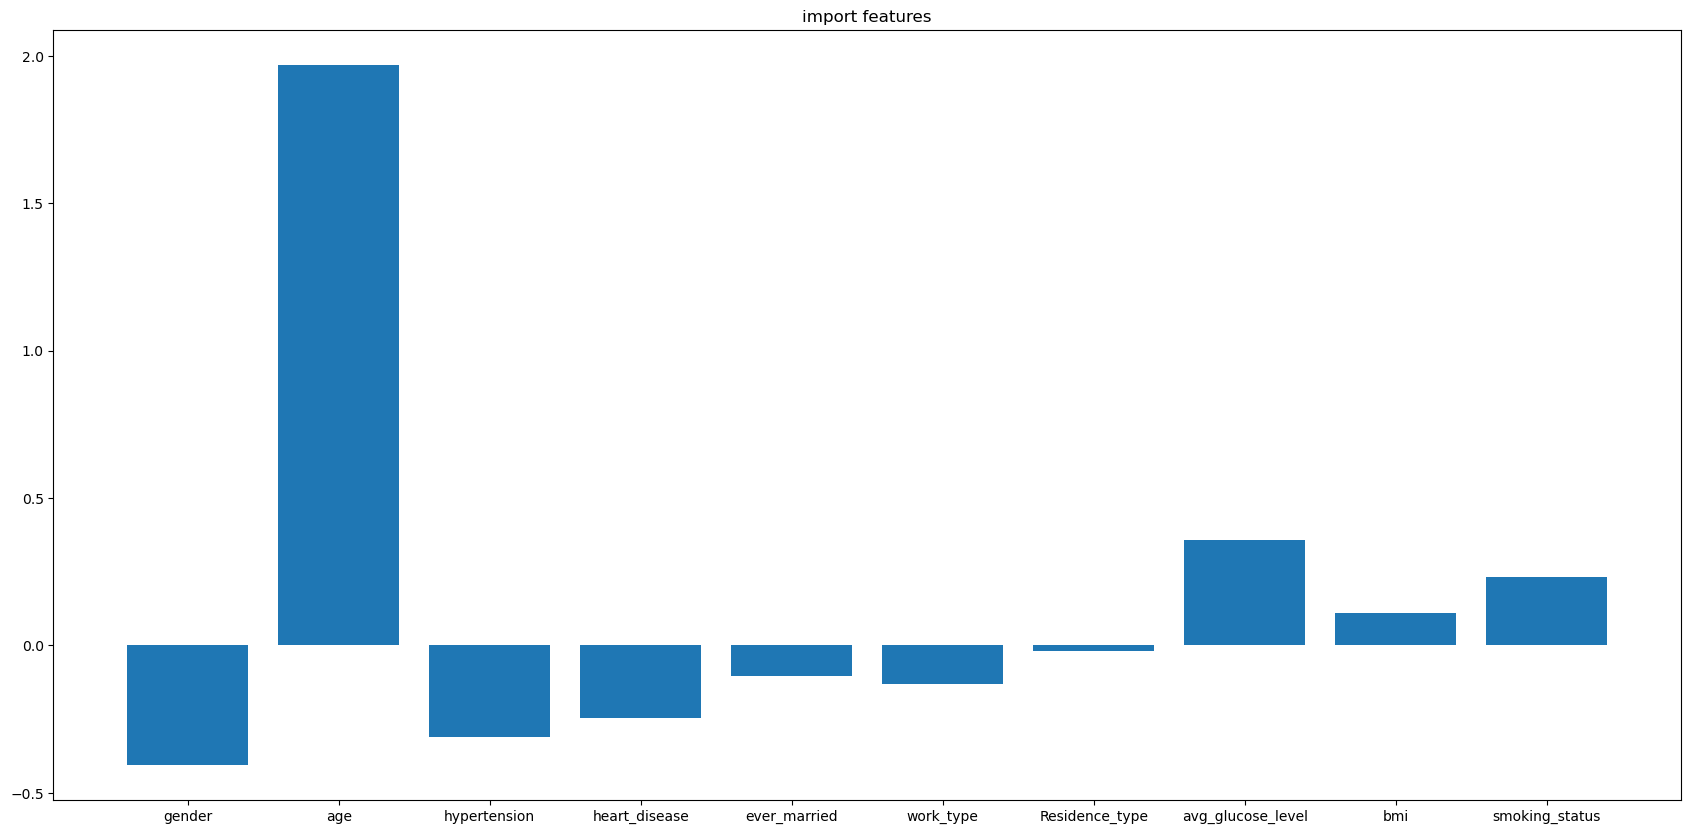

In [78]:
import matplotlib.pyplot as plt
#横坐标是类。纵是n

# len(n[0])#16
plt.figure(figsize=(21,10))
# plt.subplot(121)
plt.bar(X.columns,n[0])
plt.title('import features')
plt.show()


###  去掉乱七八糟的

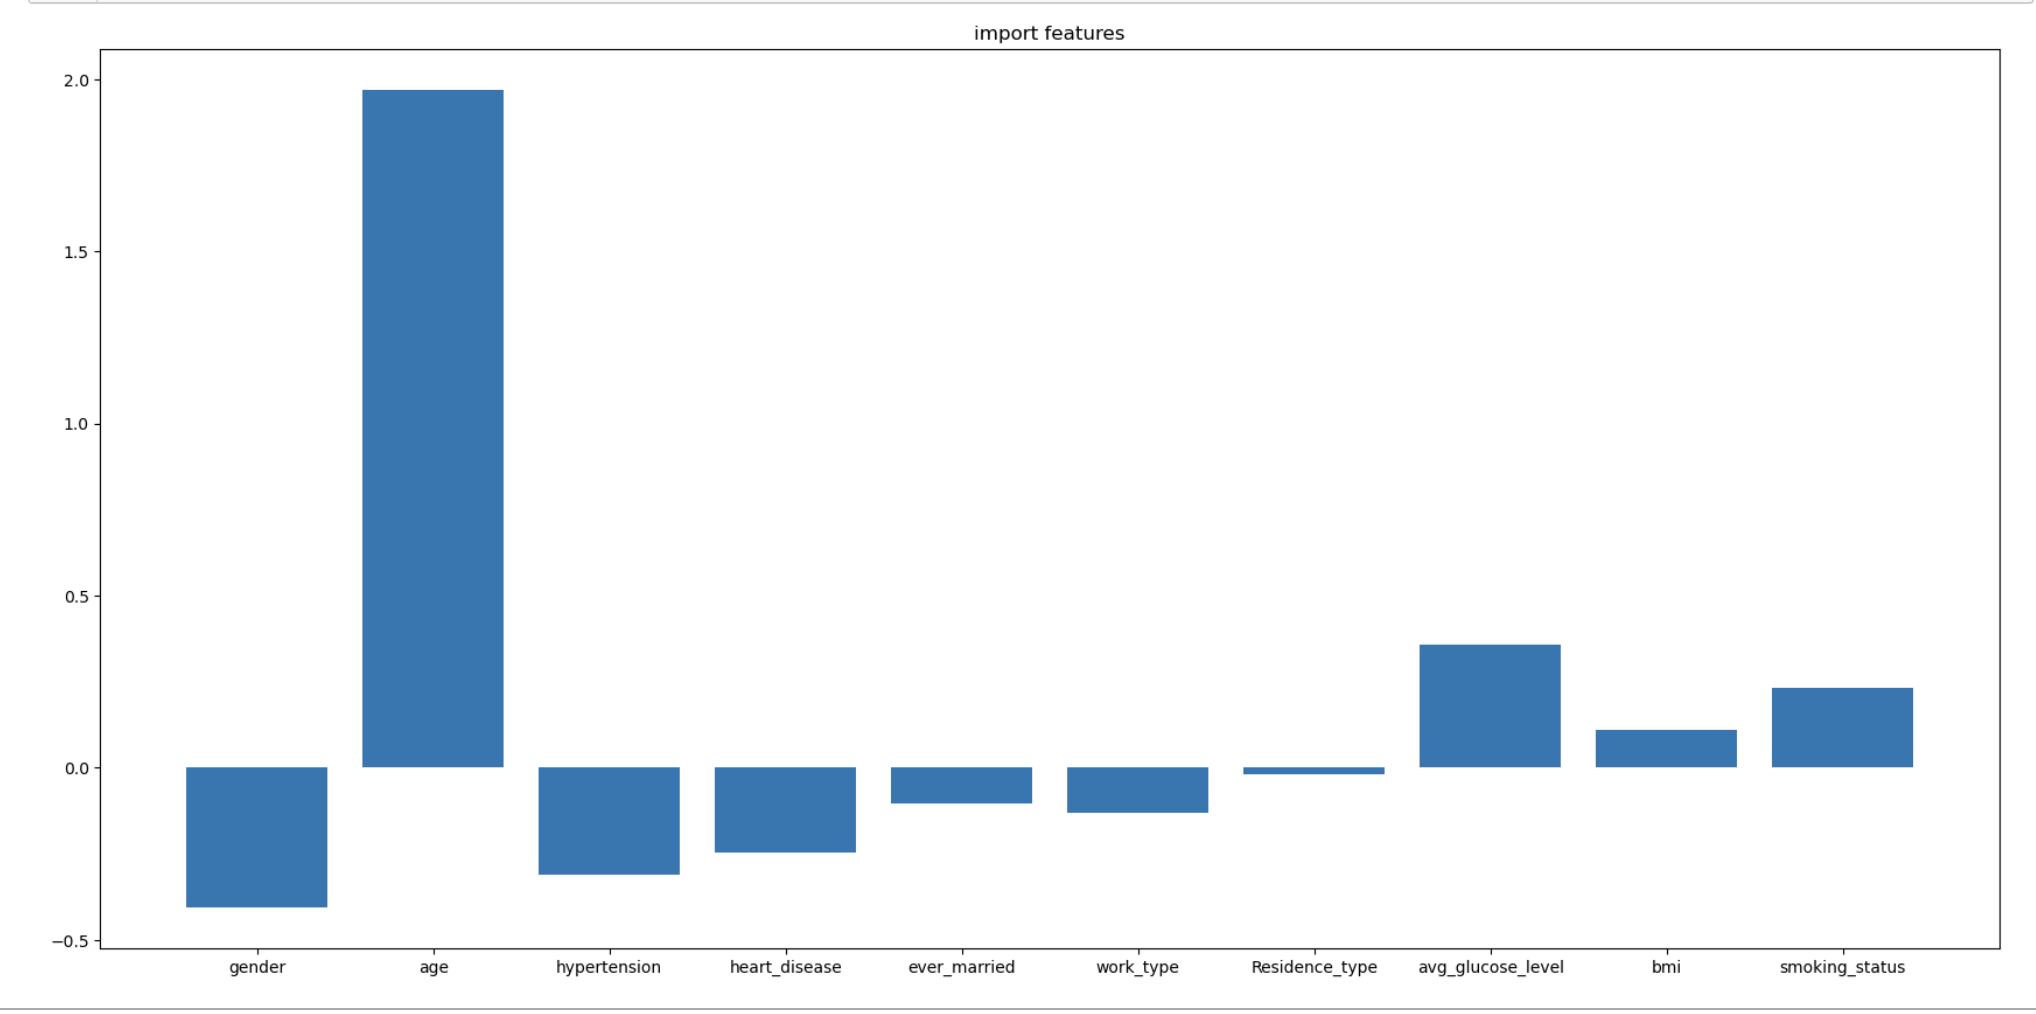

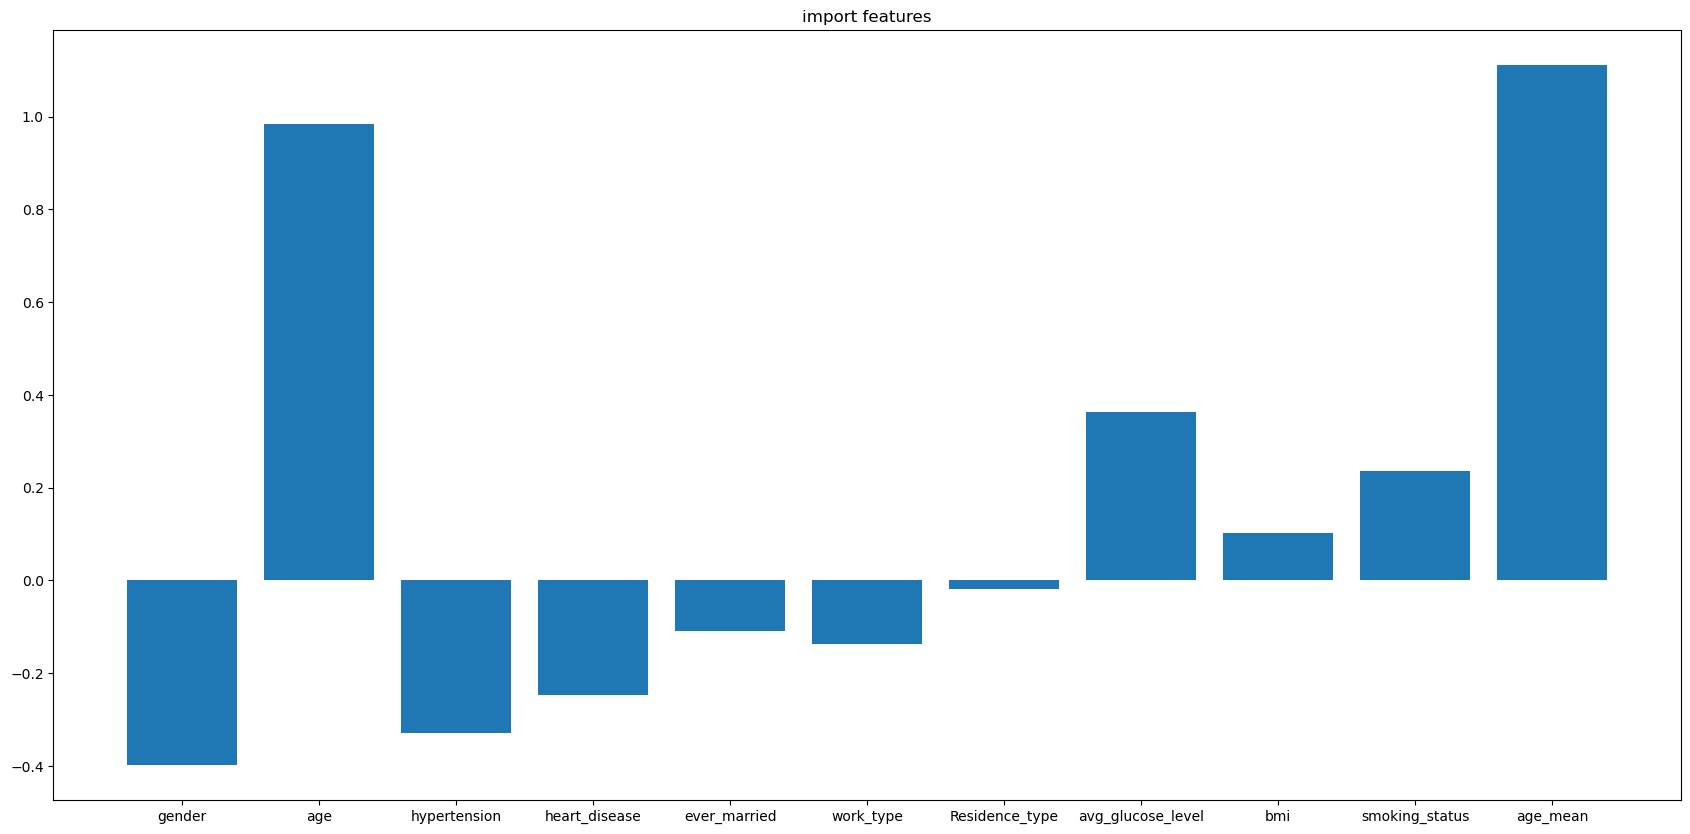

In [57]:
import matplotlib.pyplot as plt
#横坐标是类。纵是n

# len(n[0])#16
plt.figure(figsize=(21,10))
# plt.subplot(121)
plt.bar(X.columns,n[0])
plt.title('import features')
plt.show()


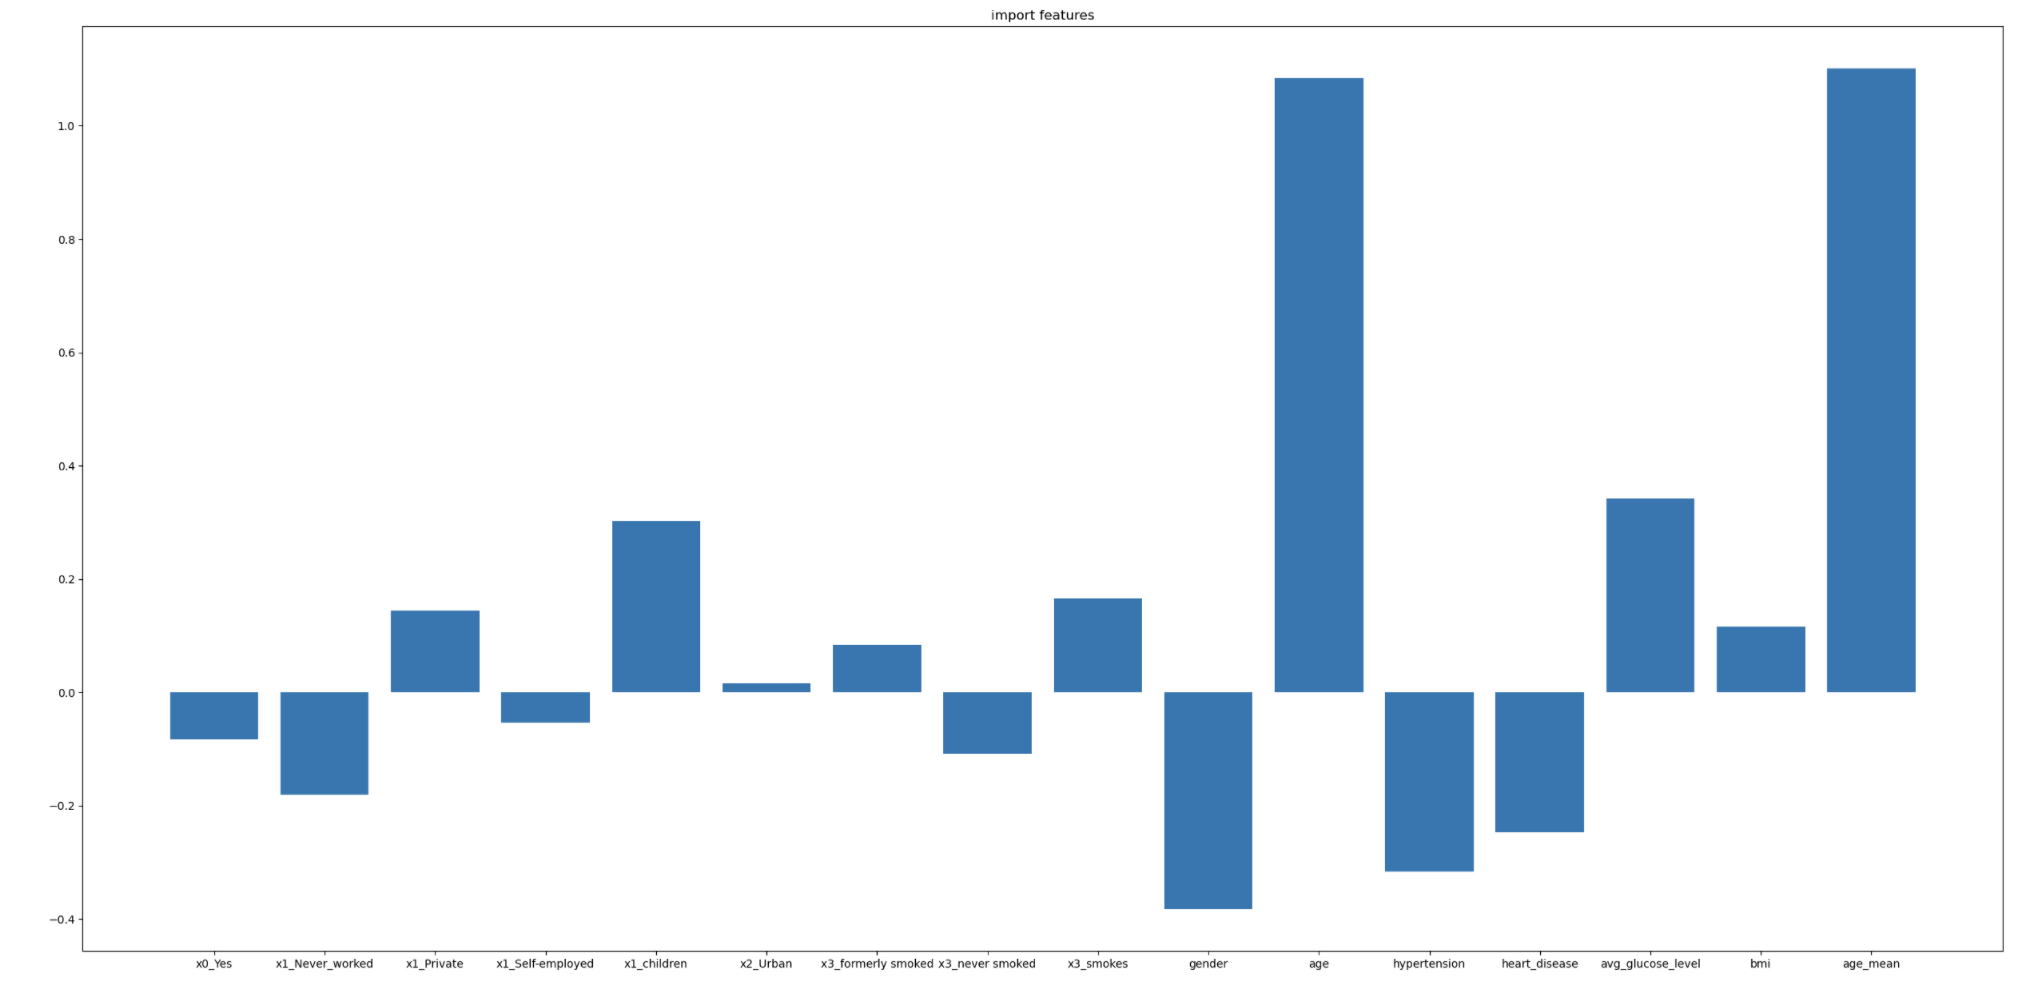

In [79]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       803
           1       0.78      0.82      0.80       802

    accuracy                           0.79      1605
   macro avg       0.79      0.79      0.79      1605
weighted avg       0.79      0.79      0.79      1605



In [80]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7919173113293976

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[614, 189],
       [145, 657]])

In [82]:
predicted_probab_log = LR.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

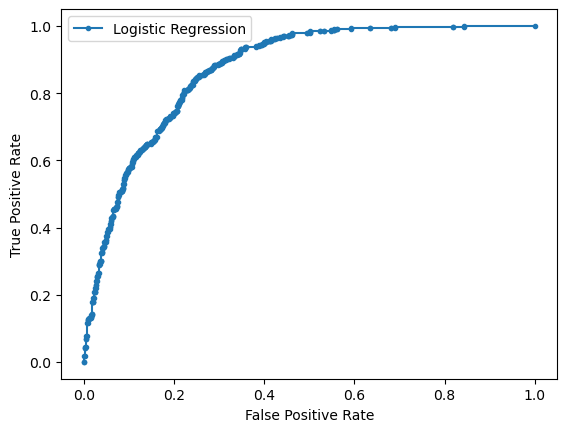

In [83]:
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()